In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
path = "/datasets/SemEval/semeval-2023-task-1-V-WSD-train-v1/train_v1/train.data.v1.txt"
label_path = "/datasets/SemEval/semeval-2023-task-1-V-WSD-train-v1/train_v1/train.gold.v1.txt"
img_path = "/datasets/SemEval/semeval-2023-task-1-V-WSD-train-v1/train_v1/train_images_v1/"

In [3]:
from random import sample
with open(path, "r") as data, open(label_path, 'r') as labels:
    data_text, labels_text = data.read(), labels.read()
    data_lines, labels_lines = data_text.split("\n"), labels_text.split("\n")
    lines = list(zip(data_lines, labels_lines))

In [207]:
import requests
import urllib
from requests_html import HTML
from requests_html import HTMLSession
import string
printable = set(string.printable)

def get_source(url):
    try:
        session = HTMLSession()
        response = session.get(url)
        return response

    except requests.exceptions.RequestException as e:
        print(e)

def get_results(query):
    query = "+".join(query.split())
    query = urllib.parse.quote_plus(query)
    response = get_source("https://www.google.com/search?q=" + query + "&hl=en")
    
    return response

def parse_results(response):
    
    css_identifier_results = [".ILfuVd", ".tF2Cxc"]
    css_identifier_texts = [".hgKElc", ".VwiC3b"]
    css_identifier_link = ".yuRUbf a"
    

    outputs = []
    has_snippet = False
    
    for idx, (css_identifier_result, css_identifier_text) in enumerate(zip(css_identifier_results, css_identifier_texts)):
        if has_snippet:
            continue
        results = response.html.find(css_identifier_result)
        output = []
        
        for result in results:
            has_link = result.find(css_identifier_link, first=True) 
            if idx == 0:
                text = result.find(css_identifier_text, first=True).text
                item = ''.join(filter(lambda x: x in printable, text))
                output.append(item)
                has_snippet = True
                
            elif idx == 1:
                if result.find(css_identifier_text, first=True) is not None:
                    text = result.find(css_identifier_text, first=True).text
                    item = ''.join(filter(lambda x: x in printable, text))
                    output.append(item)
                
        outputs.extend(output)
        
    return outputs

def google_search(query):
    response = get_results(query)
    return parse_results(response)

Aug 30, 1998  From Romans 8 we see that universal futility and misery are evidence of God's wrath against human sin. Start at Romans 8:18: I consider that the...
a person or thing that causes a loss of honour: he was a dishonour to his family. 7. an insult; affront: we did him a dishonour by not including him.
Oct 12, 2022  All have sinned and fallen short of the glory of God, and all can be justified (or declared righteous) by God by believing in Jesus (Romans 3:23...
Dishonor is a state of shame and disgrace. If you were caught lip-syncing to a recording during a singing contest, you'd probably feel a sense of dishonor.
14 Be ye not unequally yoked together with unbelievers: for what fellowship hath righteousness with unrighteousness? and what communion hath light with darkness...
For Christ also suffered once for sins, the righteous for the unrighteous, ... Whoever believes and is baptized will be saved, but whoever does not believe...
Jan 21, 2021  Even when we are dishonored, hono

AttributeError: 'NoneType' object has no attribute 'html'

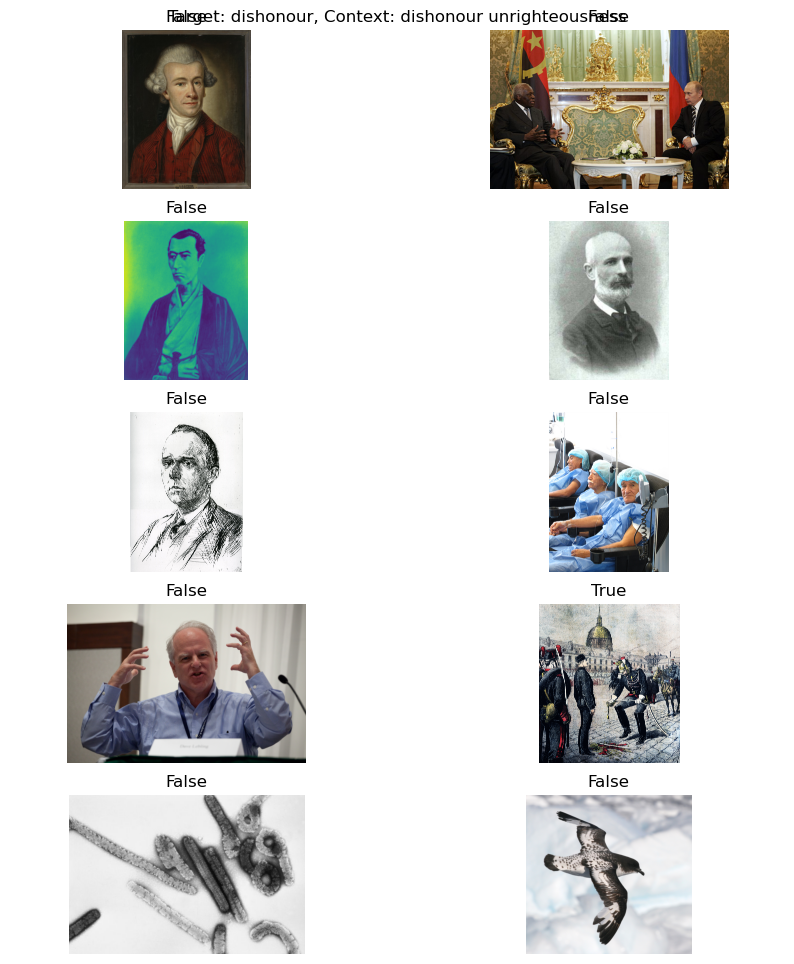

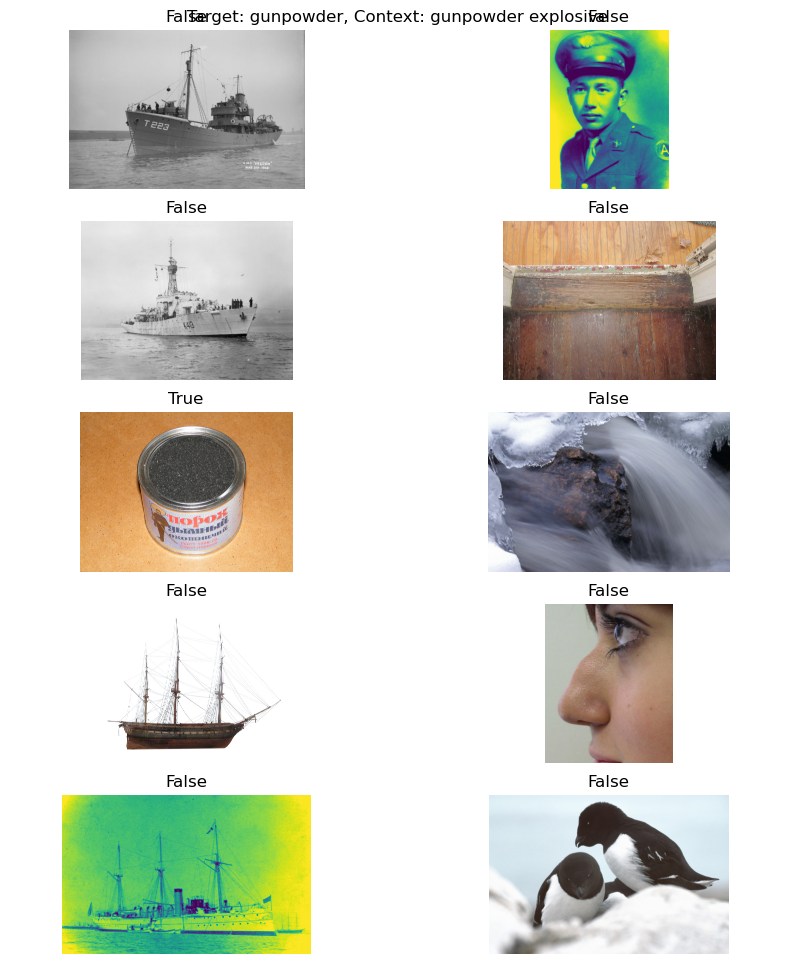

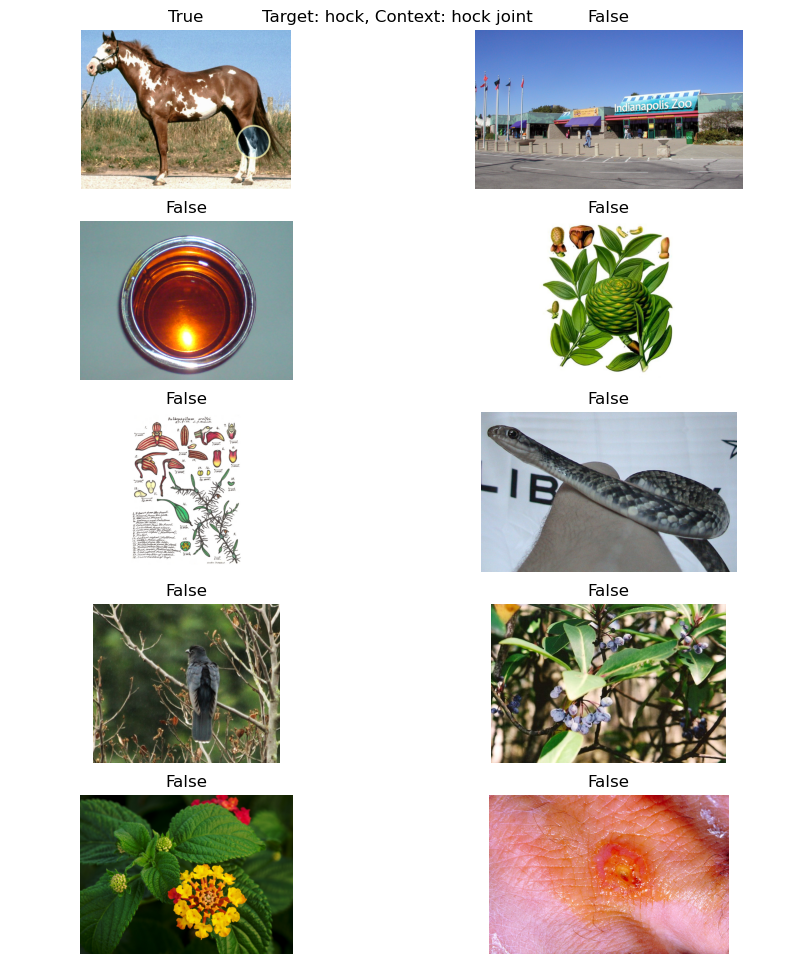

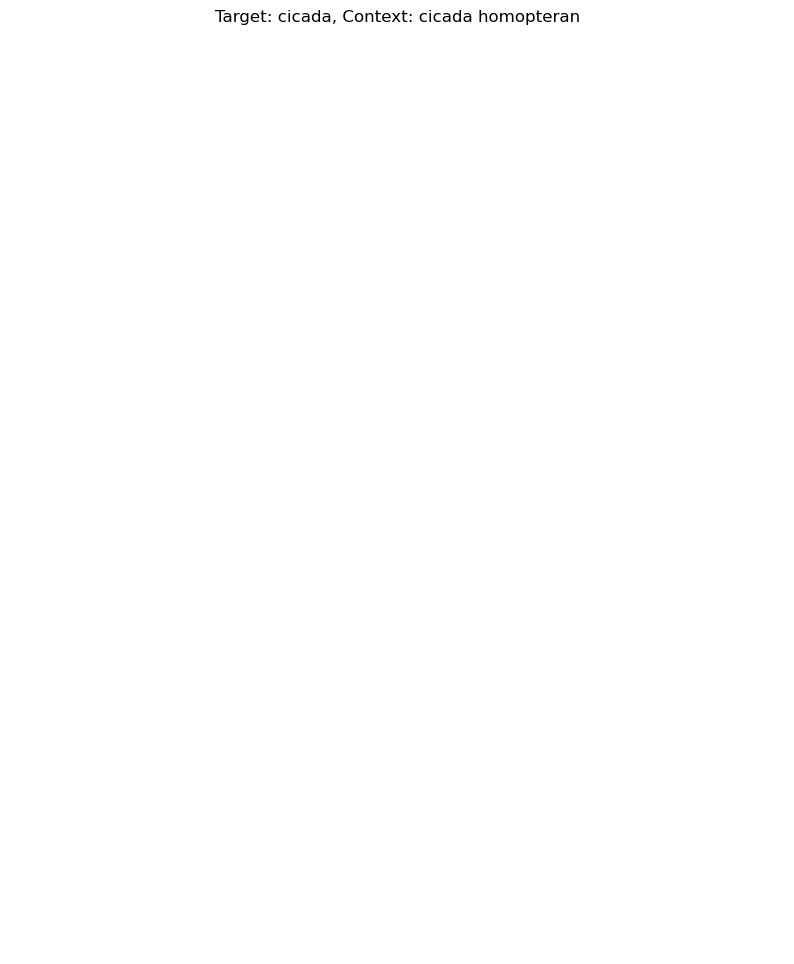

In [210]:
selected_lines = sample(lines, 15)
for data, label in selected_lines:
    
    fig = plt.figure(figsize=(10,12)) # specifying the overall grid size
    plt.axis('off')
    
    data = data.split("\t")
    target, context, images = data[0], data[1], data[2:]
    plt.title(f"Target: {target}, Context: {context}")
    scrape = google_search(f"What does {context} look like?")
    
    for item in scrape:
        print(item)

    for i, image in enumerate(images):
        img = mpimg.imread(f"{img_path}{image}")
        ax = fig.add_subplot(5, 2, i+1)
        ax.axis("off")
        
        ax.set_title("True" if image == label else "False")
        imgplot = plt.imshow(img)
        
    fig.show()

In [12]:
import requests
from pprint import pprint

In [40]:
obj = requests.get('http://api.conceptnet.io/c/en/andromeda?offset=0&limit=80').json()

In [ ]:
pprint(obj)

In [42]:
import re

In [51]:
for edge in obj["edges"]:
    if "language" in list(edge["end"].keys()) and edge["start"]["language"] == "en" and edge["end"]["language"] == "en" and edge["surfaceText"]:
        surf_txt = re.sub(r"(\[\[|\]\])", "", edge["surfaceText"])
        print(surf_txt)
        

bog rosemary is a type of andromeda
marsh andromeda is a type of andromeda
andromeda is a type of shrub
lily-of-the-valley tree is a synonym of andromeda
Pieris japonica is a synonym of andromeda
Japanese andromeda is a synonym of andromeda
Andromeda is used in the context of Greek mythology
Andromeda is a galaxy
andromeda is our neighbor glaxy
